# Working with data 2017. Class 4
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Stats
    - Definitions
    - What's a p-value?
    - One-tailed test vs two-tailed test
    - Count vs expected count (binomial test)
    - Independence between factors: ($\chi^2$ test)      
2. In-class exercises to melt, pivot, concat, merge, groupby and plot.
3. Read data from websited
4. Time series 

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from scipy.stats import chi2_contingency,ttest_ind

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline

#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


# 6 Statistics I
To learn about statistics *well*, I recommend this course: https://www.coursera.org/specializations/social-science



## 6.0 Definitions
### 6.0.1 Population vs sample
- Population: The entire set of possible observations (all people in a country in a country-level survey)
- Sample: The observations we actually have

    
### 6.0.2 Parameter vs statistic
- Parameter: The true values that define the population ($\sigma$ and $\mu$ for a normal distribution)
- Statistic: The values that we calculate using our sample (STD and MEAN for a normal distribution)
    
    
### 6.0.3 Probability
- Probability: The proportion of times where the measured event occurs in the long run. 
- For instance, the probability of a coin toss is 0.5, which means that if you toss a coin 1 million times you will more or less get 500k heads and 500k tails)


### 6.0.4 Null hypothesis:
- The hypothesis that our value is not significant.
- For instance our value can be the difference between two groups, or the difference between one group and zero.
- It is assumed to be true and we try to disprove it.
- It is "disproved" if the chances to dismiss it by chance are lower than 5%.


### 6.0.5 Alternative hypothesis:
- The hypothesis that our value is significant.
- Accepted after dismissing the null hypothesis.
    
    
### 6.0.6 Types of error:
- Type I ($\alpha$): Rejecting the null hypothesis when it was actually True (saying we have something we don't have). As a rule we set it to 0.05 and if the p-value is below it we accept the alternative hypothesis.
- Type II ($\beta$): Accepting the null hypothesis when it was actually False (saying we don't have something we actually have). This is a less important error.
    
    
### 6.0.7 p-value
- The p-value is defined as the probability of obtaining a result equal to or "more extreme" than what was actually observed, **when the null hypothesis is true.**
- "commonly misused and misinterpreted." --> a p-value of 0.01 does not mean that there is 1% chances that you are wrong!
- Low p-value can be for two reasons:
    - The null is true but your sample was unusual.
    - The null is false.
- with a p-value of 0.05 the probability of incorrectly rejecting a true null hypothesis is 23% (mainly for other bias).

### 6.0.8 Confidence intervals
- The likely range of values where the value of a parameter lies within. 
- It depends on your significance level (usually 0.05)
    
### 6.0.9 Effect size:
- Difference between the difference of the two groups (of the one group with zero) divided by the standard deviation. 
- Show the confidence intervals.
- Good summary: https://www.leeds.ac.uk/educol/documents/00002182.htm
- "For example, an AIDS vaccine study in Thailand obtained a P value of 0.039. Great! This was the first time that an AIDS vaccine had positive results. However, the confidence interval for effectiveness ranged from 1% to 52%. That’s not so impressive...the vaccine may work virtually none of the time up to half the time. The effectiveness is both low and imprecisely estimated." quote: http://blog.minitab.com/blog/adventures-in-statistics-2/five-guidelines-for-using-p-values
    
    

### 6.0.10 Correlation
- Dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other.

### 6.0.11 In general:
- Larger population: We can detect smaller differences.
- Smaller variability within groups: We can detect smaller differences.
- Large differences between groups (effect size): Unlikely that it is due to noise.



## 6.1 Biases 
### 6.1.1 Cherry-picking (yourself)
- Using individual cases or data that seem to confirm a particular position, while ignoring a significant portion of related cases or data that may contradict that position.
- Cherry picking may be committed intentionally or unintentionally. 

### 6.1.2 Look-elsewhere effect (sample size)
- If you try many things, one will be significant.
- **With a sample size large enough, any outrageous thing is likely to happen** (Persi Diaconis and Frederick Mosteller) 
- If you have a database, scan the values to see if there is something interesting, and then use that you are cheating. Your minimum p-value shouldn't be 0.05, should be 0.05/(variables scanned before hand)

### 6.1.3 Optional stopping (data collection)
- It is a well-known fact of null-hypothesis significance testing (NHST) that when there is "optional stopping" of data collection with testing at every new datum (a procedure also called "sequential testing" or "data peeking"), then the null hypothesis will eventually be rejected even when it is true. With enough random sampling from the null hypothesis, eventually there will be some accidental coincidence of outlying values so that p < .05 (conditionalizing on the current sample size). Anscombe (1954) called this phenomenon, "sampling to reach a foregone conclusion." from; http://doingbayesiandataanalysis.blogspot.nl/2013/11/optional-stopping-in-data-collection-p.html

In [58]:
print("look-elsewhere effect")
Image(url="http://www.tylervigen.com/chart-pngs/13.png",width=1000)

look-elsewhere effect


### More on the look-elsewhere effect
- If you try too many things, one of them is going to be significant.
- You need adjustments (more on that another time)
- We are creating a completely random dataset with 100 observations and 50 variables
- We are trying to see if we can fit a linear model

In [4]:
#Create some totally random data
import numpy as np
df = pd.DataFrame(np.random.random((100,51)))

cols_x = []
for i in range(50):
    cols_x.append("x"+str(i))
df.columns = ["y"] + cols_x


print(cols_x)
df.head()

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49']


,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,0.213572,0.221967,0.713657,0.983606,0.681643,0.156636,0.660690,0.293840,0.154051,0.398285,...,0.138762,0.672604,0.615953,0.782186,0.286070,0.024790,0.244314,0.800681,0.823869,0.076661
1,0.143471,0.396877,0.565624,0.307485,0.601993,0.377495,0.718098,0.231881,0.761632,0.065392,...,0.343435,0.293349,0.116651,0.631342,0.183914,0.260053,0.764687,0.095851,0.304441,0.393638
2,0.396554,0.613201,0.244101,0.813583,0.590953,0.461041,0.020353,0.025964,0.500359,0.563320,...,0.079348,0.617747,0.498122,0.395370,0.802521,0.284240,0.416556,0.290213,0.872692,0.324670
3,0.533959,0.746970,0.593383,0.672295,0.989462,0.441439,0.660520,0.541208,0.588104,0.686654,...,0.101289,0.300024,0.683742,0.867609,0.579942,0.453146,0.049929,0.290257,0.147547,0.367648
4,0.245794,0.053775,0.948439,0.980810,0.626739,0.049619,0.310976,0.996501,0.442603,0.740117,...,0.668109,0.681462,0.681842,0.633676,0.116509,0.314008,0.657629,0.651648,0.677378,0.796769


In [5]:
#Fit a regression
import statsmodels.formula.api as smf

mod = smf.ols(formula='y ~ {}'.format("+".join(cols_x)), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.347
Date:                Thu, 19 Jan 2017   Prob (F-statistic):              0.150
Time:                        09:27:01   Log-Likelihood:                 34.320
No. Observations:                 100   AIC:                             33.36
Df Residuals:                      49   BIC:                             166.2
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2051      0.447     -0.459      0.6

## 6.3 Don't do bad science
**We're in a replication crisis.**
- ALWAYS give all the information needed to replicate your results (including all the parameters of your models and your data unless restricted by licenses).
- Be aware of the biases and try to correct for them.
- Use **Bonferroni correction**: if you try 10 things, your p-value should be lower than 0.05/10 to be significant

**Number of failed replications**: `of another author (your own papers)`

`

    chemistry: 90% (60%),
    biology: 80% (60%),
    physics and engineering: 70% (50%),
    medicine: 70% (60%),
    Earth and environment science: 60% (40%).
    
`    

http://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970?WT.mc_id=SFB_NNEWS_1508_RHBox



In [4]:
Image(url="http://cdn.app.compendium.com/uploads/user/458939f4-fe08-4dbc-b271-efca0f5a2682/742d7708-efd3-492c-abff-6044d78e3bbd/Image/01bec95ec63634b9062de57edde1ecf7/replicationbypvalue.png")

## 6.4 Binomial test
In probability theory and statistics, the binomial distribution with parameters x, n and p is the discrete probability distribution of `x` number of successes in a sequence of `n` independent yes/no experiments, each of which yields success with probability `p`


The Relative Risk (RR) is the probability of the events happening in your sample of interest vs the probability of the events happening in the control group.

**What's the probability of getting 40 heads out of 100 tosses given that a coin is fair?** (p-value)

In [8]:
import scipy.stats
import statsmodels.stats.proportion

#probability of heads: p = 0.5 (50%)
#number of succeses: 40
#number of trials: n = 100

#control group = unbiased dice -> p=0.5
#sampe = this possible biased die -> p=0.4
#RR = 0.4/0.5 = 4:5 = 0.8

#p-value
pvalue = scipy.stats.binom_test(40, n=100, p=0.5)

#confidence interavls
conf = statsmodels.stats.proportion.proportion_confint(40,nobs=100,method="beta")

print(pvalue)
print(conf) #they usually do not include 0.5 (our control probability) if not significant.

0.056887933641
(0.30329476870287736, 0.50279084957766518)


## In class exercise: 
**What's the probability that 10 journalists out of 1 million people get killed if the chances of getting killed are 1 in 1 million for the entire country?** (p-value)

- What's our p for the sample and control group?
- How much more often do journalists get killed? (Calculate the RR)
- What's the null hypothesis?
- What's the p-value associated?
- What are the confidence intervals of our p? (give it in people killed per 10 million people)
- What can we say?

In [15]:
#Code here

#number of succeses: 10
#number of trials: 1000000

#control group = unbiased dice -> p = 1/1000000
#sampe = this possible biased die -> p= 10/1000000
#RR = 10

pvalue = scipy.stats.binom_test(10,1000000,p=1/1000000)


conf = statsmodels.stats.proportion.proportion_confint(10,nobs=1000000,method="beta",alpha=0.001)
print(pvalue)
print(conf)
conf[0]*1000000,conf[1]*1000000

1.1142142324e-07
(2.6990416095007298e-06, 2.5255366737031437e-05)


(2.6990416095007297, 25.255366737031437)

---

### How does it actually work?
- You have these fail/success trials and they are independent.
- The probability of sucess is p.
- The probability of getting at least x successes out of n trials is given by a binomial distribution. Which means we can calculate the probability of getting a more extreme result than x out of n trials.

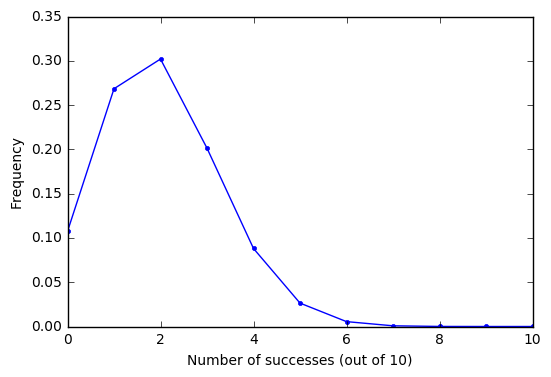

In [72]:
#just plotting a binomial distribution, no worries about the code
x = np.linspace(0,10,11)
pmf = scipy.stats.binom.pmf(x,10,0.2)
plt.plot(x,pmf,".-")
plt.xlabel("Number of successes (out of 10)")
plt.ylabel("Frequency")

**A note on one-sided test vs two-sided tests**
- Use always two-sided test (the default) unless you *really* understand what you are doing.
- An example of an acceptable situation where you can use a one-sided test is if you are walking around the city and say: "oh, I bet the journalists in India have higher murder rates than politicians". Then you can use one-sided tests. 
- An example of an unacceptable way to do it is if you are checking the murder rates for different collectives and say, "oh, this seems higher, I'm going to check if it significant"
- Every statistical test function have an argument that allows you to use "one-tail", "one-sided", "greater", or something like that

## 6.5 $\chi^2$ (chi-square) test 
### 6.2.1 Independence between variables using contingency tables:
`In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them.` (wikipedia)
- Visualize interaction between **categorical data**
- We can use the $\chi^2$ (chi-square) test to see if the interactions are significant.


- It has a problem: **The expected (not the observed) count in each cell needs to be greater than 3-5**
- If this does not happen we can use the Fisher test

**Example 1:** We will use this class as a sample

    `Is the probability of having dark eyes independent of the gender?`

- Why should it not?
- Why could it?

In [22]:
df_eyes = pd.DataFrame(
    [
        [10,5],
        [5,10]
    ],columns=["Dark","Clear"],index=["Male","Female"])

df_eyes

,Dark,Clear
Male,10,5
Female,5,10


In [24]:
import scipy.stats
chi,p,dof,expected = scipy.stats.chi2_contingency(df_eyes)
print(p)
display(expected)

0.144127034816


array([[ 7.5,  7.5],
       [ 7.5,  7.5]])

In [25]:
#Ratios
ratio_real_vs_expected = df_eyes/expected
ratio_real_vs_expected

,Dark,Clear
Male,1.333333,0.666667
Female,0.666667,1.333333


### How does it actually work?
- The program calculates for each cell $\chi^2 = (Observed^2-Expected^2)/(Expected^2)$.
- The degrees of freedom (a parameter) is $(\#rows-1)\cdot(\#columns-1)$.
- The probability of getting a value higher than chi_stat is given by a $\chi^2$ distribution. Which means we can calculate the probability of getting a more extreme result than x out of n trials.

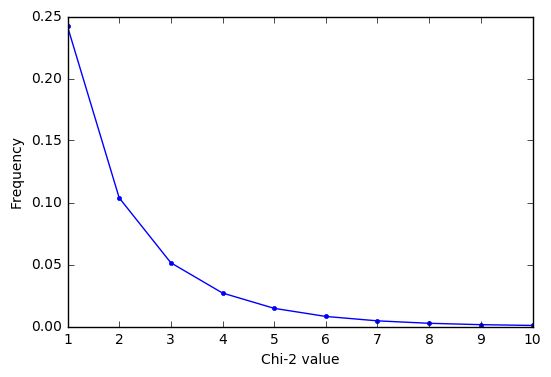

In [73]:
#just plotting a chi-square distribution, no worries
x = np.linspace(0,10,11)
pmf = scipy.stats.chi2.pdf(x,df=1)
plt.plot(x,pmf,".-")
plt.xlabel("Chi-2 value")
plt.ylabel("Frequency")

### In-class exercise
Using LAPOP (survey data for Latin America): http://datasets.americasbarometer.org/database-login/usersearch.php?year=2014
We are going to see if there is any relationship between the best method to finish the conflict in Colombia and the belief that the conflict will end in the next year

In [48]:
#Read the data from colombia in "data/colombia.dta", it's a stata file
df = pd.read_stata("data/colombia.dta")
df.to_csv("data/colombia.csv",index=None)
df = pd.read_csv("data/colombia.csv")

In [49]:
df.groupby("upm").mean().reset_index()

,upm,cluster,fecha,wt,q2y,q2,vic1exta,q12c,q12bn,gi7
0,5154.0,110.500000,1.397938e+18,1.0,1978.166667,35.833333,2.333333,4.166667,1.583333,29.785714
1,5400.0,114.500000,1.397012e+18,1.0,1975.375000,38.625000,1.000000,4.750000,0.666667,35.250000
2,5440.0,118.500000,1.397326e+18,1.0,1974.833333,39.166667,1.000000,4.333333,1.000000,NaN
3,5665.0,122.500000,1.397182e+18,1.0,1976.625000,37.375000,NaN,4.541667,1.695652,99.142857
4,5686.0,126.500000,1.397434e+18,1.0,1976.208333,37.791667,1.200000,5.000000,1.166667,34.750000
5,8436.0,10.500000,1.396613e+18,1.0,1977.125000,36.875000,6.000000,5.583333,1.458333,60.400000
6,13001.0,14.500000,1.400393e+18,1.0,1976.500000,37.500000,2.333333,4.541667,1.250000,56.818182
7,13430.0,18.500000,1.397218e+18,1.0,1977.791667,36.208333,1.800000,4.625000,1.416667,59.125000
8,15176.0,154.500000,1.401394e+18,1.0,1978.583333,35.416667,2.000000,4.541667,1.625000,56.600000
9,15469.0,158.500000,1.398859e+18,1.0,1972.500000,41.500000,1.375000,3.708333,0.916667,27.562500


In [27]:
x_variable = df["colpaz1a"] #What is the best method to continue in the conflict
other_variables =[df["colpaz2a"]] #What are the chances that peace happens within one year


In [28]:
#Create a contingency table (pd.crosstab) between the x_variable and the other_variables
col_crosstab = pd.crosstab(x_variable,other_variables)
col_crosstab

colpaz2a,Muy posible,Posible,Poco posible,Nada posible
colpaz1a,,,,
Negociación,58,239,358,165
Uso de la fuerza militar,6,32,144,327
[No leer] Ambas,2,13,34,40


In [29]:
#Calculate the chi-square test
chi,p,dof,expected = chi,p,dof,expected = scipy.stats.chi2_contingency(col_crosstab)
print(p)
display(expected)

4.36219476812e-60


array([[  38.16643159,  164.23131171,  309.95768688,  307.64456982],
       [  23.69111425,  101.94358251,  192.40056417,  190.96473907],
       [   4.14245416,   17.82510578,   33.64174894,   33.39069111]])

In [30]:
col_crosstab/expected

colpaz2a,Muy posible,Posible,Poco posible,Nada posible
colpaz1a,,,,
Negociación,1.519660,1.455265,1.154996,0.536333
Uso de la fuerza militar,0.253260,0.313899,0.748439,1.712358
[No leer] Ambas,0.482806,0.729308,1.010649,1.197939


**Is it significant?**


In [31]:
##Now let's add gender
x_variable = df["colpaz1a"] #What is the best method to continue
other_variables =[df["q1"],df["colpaz2a"]] #Gender and what are the chances that peace happens within one year


In [35]:
#Create a contingency table (pd.crosstab) between the x_variable and the other_variables
col_crosstab = pd.crosstab(x_variable,other_variables)
col_crosstab

q1                            Hombre                                    \
colpaz2a                 Muy posible Posible Poco posible Nada posible   
colpaz1a                                                                 
Negociación                       32     121          169           71   
Uso de la fuerza militar           3      22           74          186   
[No leer] Ambas                    0       4           17           22   

q1                             Mujer                                    
colpaz2a                 Muy posible Posible Poco posible Nada posible  
colpaz1a                                                                
Negociación                       26     118          189           94  
Uso de la fuerza militar           3      10           70          141  
[No leer] Ambas                    2       9           17           18

In [36]:
#Calculate the chi-square test
chi,p,dof,expected = chi,p,dof,expected = scipy.stats.chi2_contingency(col_crosstab)
print(p)
display(expected)

1.31700597089e-56


array([[  20.23977433,   85.00705219,  150.35260931,  161.33991537,
          17.92665726,   79.22425952,  159.60507757,  146.30465444],
       [  12.56346968,   52.76657264,   93.32863188,  100.14880113,
          11.12764457,   49.17700987,   99.0719323 ,   90.81593794],
       [   2.19675599,    9.22637518,   16.31875882,   17.5112835 ,
           1.94569817,    8.59873061,   17.32299013,   15.87940762]])

In [37]:
col_crosstab/expected

q1                            Hombre                                      \
colpaz2a                 Muy posible   Posible Poco posible Nada posible   
colpaz1a                                                                   
Negociación                 1.581045  1.423411     1.124024     0.440065   
Uso de la fuerza militar    0.238788  0.416931     0.792897     1.857236   
[No leer] Ambas             0.000000  0.433540     1.041746     1.256333   

q1                             Mujer                                      
colpaz2a                 Muy posible   Posible Poco posible Nada posible  
colpaz1a                                                                  
Negociación                 1.450354  1.489443     1.184173     0.642495  
Uso de la fuerza militar    0.269599  0.203347     0.706557     1.552591  
[No leer] Ambas             1.027909  1.046666     0.981355     1.133544

**Is it significant?**


** Let's use R, Fisher test for big tables do not exist in Python **

In [ ]:
#Install R (already installed)
!conda install -c r r-essentials

#Install link between R and python (already installed)
!pip install rpy2

In [38]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [39]:
%%R -i col_crosstab
fisher.test(col_crosstab,simulate.p.value=TRUE,B=1e6)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  col_crosstab
p-value = 1e-06
alternative hypothesis: two.sided

